# ASSIGNMENT 2: SUMS AND DIFFERENCES

# DUE: 5PM 5 JUNE 2018

# SOLUTIONS POSTED: 11 JUNE 2018

** INSTRUCTIONS: **

**0) You must cite any material (*code or information*) you use from the internet or any other source. You can do this in comments in your code, or seperate Markdown cells. You can use any source, as long as you cite it!**

**1) Please feel free to work in groups. It's more fun and more effective. However, if you do work in groups, you must state the people you worked with here:**

**TEAM MEMBERS:**

Yinda WANG (SID:440090418), Jiaru LI (SID:460149307)

**EVERY PERSON IN THE GROUP MUST SUBMIT THEIR OWN ASSIGNMENT.**

**2) Make sure to save your work. I recommend working out of a new notebook that you create with different name than this file. This will make it so you'll never lose any work if I make an update at some point. **

**3) I will make sure your code runs without errors and gives the correct results in a reasonable amount of time. I do not care about the fine details of how you get it to work. **

**4) If you can't solve a problem: I will give partial credit for a Markdown explanation about your thinking. For example, this might include a paragraph explaining your reasoning.**

**5) The programs in Problems 1, and Problem 2 do not need each other to work.**

**6) I will not test your functions out of any range that I specify in the text.**

**7) All the required material for this Assignment has been covered in the Lectures and Tutorials. You can find examples in the online notebooks.**

**8) READ EVERYTHING CAREFULLY.**

**9) MAKE SURE TO LABEL ALL YOUR PLOTS CORRECTLY.**

**10) GOOD LUCK!**

# Problem 1: 

## 1a: Gauss-Legendre quadrature:

Consider the three-term recursion relation

$$
P_{n+1}(x) \ = \ \frac{(2n+1)}{n+1} \,  x \, P_{n}(x) - \frac{n}{n+1} \, P_{n-1}(x) 
,
\quad \mathrm{with} \quad 
P_{0}(x) \ = \ 1, \quad P_{1}(x) \ = \ x 
$$

This generates a sequence called ***Legendre polynomials.*** For example,

$$
P_{5}(x) \ = \ \frac{1}{8} \left(63 x^5-70
   x^3+15 x\right), \quad P_{4}(x) \ = \ \frac{1}{8} \left(35 x^4-30
   x^2+3\right), \quad P_{3}(x) \ = \ \frac{1}{2} \left(5 x^3-3
   x\right), \quad P_{2}(x) \ = \ \frac{1}{2} \left(3
   x^2-1\right)
$$


<br>

Now consider a second three-term recursion relation.

$$
Q_{n+1}(x) \ = \ (2\, n+1)\, P_{n}(x) \ + \ Q_{n-1}(x)
,
\quad \mathrm{with} \quad 
Q_{0}(x) \ = \ 0, \quad Q_{1}(x) \ = \ 1 
$$


It's possible to prove that 

$$
Q_{n}(x) \ = \ \frac{d}{dx}P_{n}(x).
$$

This means that $P_{n}(x)$ is an $n$th-order polynomial, and $Q_{n}(x)$ is an $(n-1)$th-order polynomial.


### TASK 1:
Make a function that takes a `numpy` array of `x` values (of any length) and returns all the polynomals $P_{n}(x)$ and $Q_{n}(x)$ up to order `n=N`.  *Hint: Fill in the given zero arrays with the higher-order * ` P[n]` and  `Q[n].`

In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
def Legendre(N,x):
    
    P = np.zeros((N+1,len(x)))
    Q = np.zeros((N+1,len(x)))
    
    P[0], P[1] = 1 + 0*x, x
    
    ### PUT CODE HERE ###
    Q[1] = 1 + 0*x
    
    for n in range(1,N):
        P[n+1] = ((2*n+1)*x*P[n] - n*P[n-1])/(n+1)
        Q[n+1] = (2*n+1)*P[n] + Q[n-1] 
    return P, Q

We are interested in the $N$ ***roots*** of the $P_{N}$. That is,

$$
P_{N}(\, x_{\,i} \, ) \ = \ 0
$$

The roots are not known exactly. But they are close to 

$$
x_{\,i} \ \approx \ \cos\left( \pi \frac{ 4 \, i + 3  }{4 \, N+ 2} \right), \quad \mathrm{for} \quad i = 0, \ldots N-1
$$


If we know the roots, then we can define a set of set of $N$ ***weights***

$$
w_{i} \ \equiv \ \frac{2}{(1-x_{i}^{2})\, Q_{N}(x_{i})^{2}}
$$


### TASK 2:
Write a function called `quadrature` that computes the roots `x`, and weights, `w,` and returns the reslts as `lenth`-`N` `numpy` arrays.  

*Hint: you'll have to use Newton's method for this. This is why you need to compute both P[N] and Q[N]. Use the above formula as an inital guess. You can monitor the error and/or number of iterations how ever you want. Just make sure the results are as converged as possible.*

In [7]:
def quadrature(N,iteration=20):
    
    # Initial guess: 
    i = np.arange(N)
    x = np.cos(np.pi*(4*i+3)/(4*N+2))
    
    ## PUT CODE HERE ##
    try:
        for i in range(iteration):
            P, Q = Legendre(N,x)
            dx = P[N]/Q[N]
            x = x - dx
            w = 2/((1-x**2)*(Q[N]**2))
    except:
        print('Error:',np.max(np.abs(dx)))
    
    return x, w

### TASK 3:
Using `plt.subplots`, make 2 side-by-side plots of $w$ versus $x$; one for $N=10$, and one for $N=100$. Make sure to put titles on them and label the axes properly.

Text(0,0.5,'w')

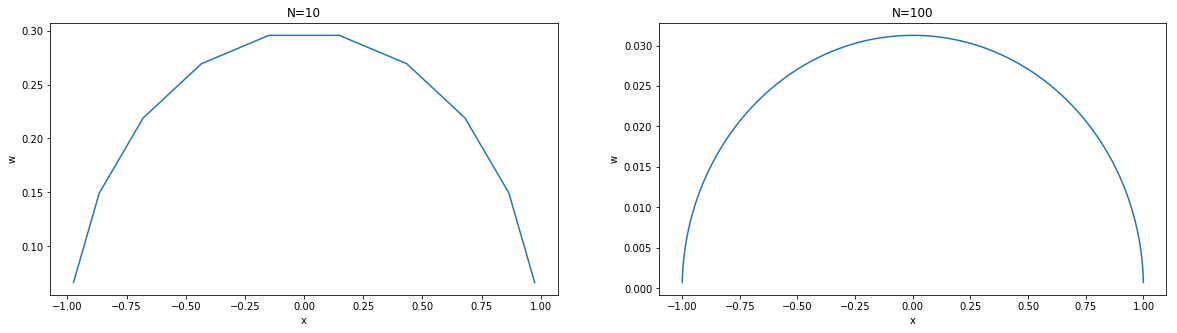

In [8]:
### PUT CODE HERE ###
fig, ax = plt.subplots(1,2,figsize=(20,5))

x, w = quadrature(10)

ax[0].plot(x,w)
ax[0].set_title('N=10')
ax[0].set_xlabel('x')
ax[0].set_ylabel('w')


x, w = quadrature(100)

ax[1].plot(x,w)
ax[1].set_title('N=100')
ax[1].set_xlabel('x')
ax[1].set_ylabel('w')

### TASK 4:

It's a fact that
$$
\lim_{N\to\infty} \,  N\, w  \ = \ \mu(x) 
$$

Find $\mu(x)$. *Hint: You should be able to deduce the shape of $\mu(x)$ from your plots above.*

Make a plot of $N\, w$ and $\mu(x)$ versus $x$ for $N=100$. Do this on the same plot. 

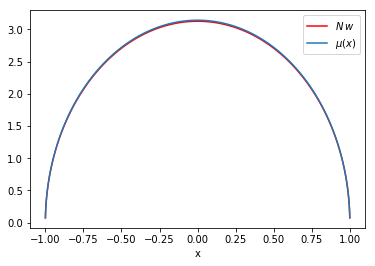

In [9]:
N = 100
x, w = quadrature(N)

plt.plot(x,N*w,color='red')
plt.plot(x,np.pi*np.sqrt(1-x**2))
plt.xlabel('x')
plt.legend(['$N\, w$','$\mu(x)$'])

**Guass-Legendre Integration:**

The whole point of computing $x$ and $w$ is the following:

$$
\int_{-1}^{1} f(x) \, \mathrm{d}x \ \approx \ \sum_{i=0}^{N-1} w_{i} \, f(\,x_{i}\,)  
$$

This integration method will converge much more rapidly than the standard Simpson's etc. In fact it's *exact* if $f(x)$ is any polynomial up to degree $2N+1$.

***From now on, everything is easier if we always assume $N$ is even.*** 

### TASK 5:
Make a function called `integrate` that accepts another function, `f`, the grid, `x`, and the weights `w`, and returns the integral.

In [10]:
def integrate(f,x,w):
    
    return np.sum(w*f(x))  

### TASK 6:
Compute the integral

$$
I \ = \ \int_{-1}^{1} e^{\,x} \, \mathrm{d} x 
$$

Do this using your quadrature scheme for $\ 4 \le N \le 20$ and print the error. 

*Hint: the exact value of the integral is*

$$
I \ = \ e - \frac{1}{e}
$$

Make sure to format the `print` statements nicely showing both `N` and the error.

In [11]:
def e(x): return np.exp(x)

I = e(1) - e(-1)

print(' N       Error')
for N in range(4,22,2):
    x, w = quadrature(N)
    error = abs(integrate(e,x,w)-I)/I
    print('%2i       %.2e' %(N, error))

print('Error = |approximation - I|/I')
print('The exact value of the integral I is %s' %I)

 N       Error
 4       1.26e-07
 6       6.67e-13
 8       3.78e-16
10       7.56e-16
12       3.78e-16
14       7.56e-16
16       3.78e-16
18       3.78e-16
20       7.56e-16
Error = |approximation - I|/I
The exact value of the integral I is 2.3504023872876028


### TASK 7:
Print the error in computing $I$ using the Trapezoidal rule with 20 evenly spaced points.

In [12]:
print(' N   Error')
for N in range(4,22,2):
    
    x = np.linspace(-1,1,N)
    h = x[1] - x[0]
    I_trap = h*(0.5*(e(x[0]) + e(x[-1])) + np.sum(e(x[1:-1])))
    error = abs(I_trap - I)/I
    print('%2i   %.2e' %(N, error))
    
print('Error = |approximate - I|/I')

 N   Error
 4   3.68e-02
 6   1.33e-02
 8   6.79e-03
10   4.11e-03
12   2.75e-03
14   1.97e-03
16   1.48e-03
18   1.15e-03
20   9.23e-04
Error = |approximate - I|/I


## 1b: Integrating when we don't even really know the function.

Consider the function, $y(t)$ given by the implicit relation 

$$
y(t) \, e^{ \, y(t) }  \ = \ t 
$$

There is no closed-form solution for $y(t)$. 
But clearly $y=0$ is a solution when $t=0$. 
And both $y$ and $t$ increase together. 
This means that there is a one-to-one relationship and we can solve it numerically. 

### TASK 8:
Plot $y$ as a function of $t$ without solving for $y$. This means, making a grid of values for $y$, computing the corresponding values for $t$. Put $t$ on the traditiononal `x`-axis, and $y$ on the traditional `y`-axis.

Also plot the function 

$$
 \log( t+1)
$$

on the same plot and make a legend to show which one is which. 

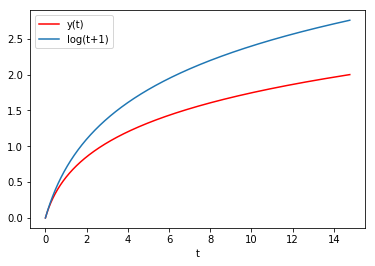

In [13]:
y = np.linspace(0,2,1000)
t = y*e(y)

fig, ax = plt.subplots()

ax.plot(t,y,color='red')
ax.plot(t,np.log(t+1))
ax.set_xlabel('t')
ax.legend(['y(t)','log(t+1)'])

**Now consider the integral**

$$
I(z) \ = \ \int_{0}^{z} \frac{\sin(t)}{1+t\, y(t)}\, \mathrm{d} t, \quad \mathrm{for} \quad z \ \ge  \ 0.
$$

### TASK 9:
The quadrature scheme assumes the integration goes from $-1$ to $+1$. To compute $I(k)$ you'll need to transform from $x$ to $t$ and rescale $w$ to $dt$. 

Make a function that does the transformation and returns a new grid and weights, `t`, and `dt`:

In [14]:
def scale(z,x,w):
        
    t  = z*(x+1)/2
    dt = z*w/2
    
    return t, dt

### TASK 10:
Make a function that takes $t$ values and uses Newton's method to compute the solution to the equation 

$$
y \, e^{\,y} - t \ = \ 0
$$


*Hint: The initial guess* $y=\log(t+1)$ *works  well enough.*

In [15]:
def y(t,iteration=20):
    
    # Initial guess
    
    y = np.log(t+1)
    
    ## PUT CODE HERE ###
    for i in range(iteration):
        y = (y**2 + t*np.exp(-y))/(1+y)
    
    return y

### TASK 11:
Make a plot of

$$
f(t) \ = \ \frac{\sin(t)}{1+t\, y(t)}, \quad \mathrm{for}\quad 0 \le \, t \le \, 30
$$

Use enough points to make the plot smooth. *Hint: you should be able to use $y(t)$ just like any other function.*

Text(0,0.5,'f(t)')

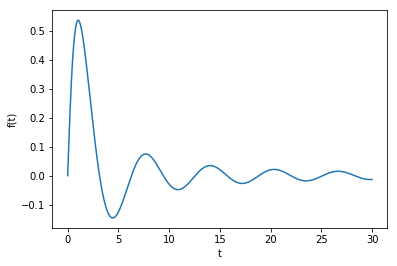

In [16]:
t = np.linspace(0,30,2000)
f = np.sin(t)/(1+t*y(t))

fig, ax = plt.subplots()

ax.plot(t,f)
ax.set_xlabel('t')
ax.set_ylabel('f(t)')

### TASK 12:
Make a function called `I` that takes `z`, and a number of grid points, `N` and computes the integral.

In [17]:
def I(z,N):
    
    x, w = quadrature(N)
    t, dt = scale(z,x,w)
    f = np.sin(t)/(1+t*y(t))
    
    return np.sum(f*dt)

### TASK 13:
What value of $N$ do you need `I(np.pi,N)` to converge to at least 12 digits? 
*Hint: compare the resuts for $N$ and $N+2$.*

In [18]:
print(' N  I(np.pi,N)         I(np.pi,N+2)         Absolute Difference')
for N in range(2,22,2):
    print('%2i  %.15s    %.15s      %.2e' %(N,I(np.pi,N),I(np.pi,N+2),abs(I(np.pi,N+2)-I(np.pi,N))))

 N  I(np.pi,N)         I(np.pi,N+2)         Absolute Difference
 2  1.0401568001891    1.0035872333086      3.66e-02
 4  1.0035872333086    1.0048364682793      1.25e-03
 6  1.0048364682793    1.0048188622106      1.76e-05
 8  1.0048188622106    1.0048191199056      2.58e-07
10  1.0048191199056    1.0048191251012      5.20e-09
12  1.0048191251012    1.0048191252128      1.12e-10
14  1.0048191252128    1.0048191252246      1.17e-11
16  1.0048191252246    1.0048191252251      5.20e-13
18  1.0048191252251    1.0048191252251      3.04e-14
20  1.0048191252251    1.0048191252251      2.00e-15


Hence we need $N \geq 16$ to converge to at least 12 digits. 

### TASK 14:
What value of $N$ do you need `I(10,N)` to converge to at least 12 digits? 

In [19]:
N = 2
D = abs(I(10,N+2) - I(10,N))
print(' N  I(10,N)            I(10,N+2)         Absolute Difference')

while D >= 1e-13:
    print('%2i  %.15s    %.15s   %.2e' %(N,I(10,N),I(10,N+2),abs(I(10,N+2)-I(10,N))))
    N += 2
    D = abs(I(10,N+2) - I(10,N))

 N  I(10,N)            I(10,N+2)         Absolute Difference
 2  1.8670766530737    0.8708871711730   9.96e-01
 4  0.8708871711730    0.8484945423797   2.24e-02
 6  0.8484945423797    0.8550688425211   6.57e-03
 8  0.8550688425211    0.8554943968547   4.26e-04
10  0.8554943968547    0.8554401652610   5.42e-05
12  0.8554401652610    0.8554356058004   4.56e-06
14  0.8554356058004    0.8554362197320   6.14e-07
16  0.8554362197320    0.8554363019486   8.22e-08
18  0.8554363019486    0.8554363011730   7.76e-10
20  0.8554363011730    0.8554363010066   1.66e-10
22  0.8554363010066    0.8554363011374   1.31e-10
24  0.8554363011374    0.8554363011649   2.76e-11
26  0.8554363011649    0.8554363011685   3.56e-12
28  0.8554363011685    0.8554363011691   6.16e-13
30  0.8554363011691    0.8554363011692   1.35e-13


Hence we need $N \geq 30$ to converge to at least 12 digits.

### TASK 15:
Plot $I(z)$ for $0 \ \le z \le 30$.  Assume $I(0)=0$ by definition. Compute enough values of $z$ to make the plot look smooth.

Text(0,0.5,'I(z)')

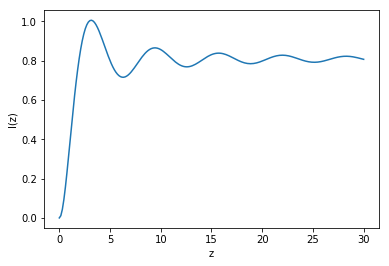

In [20]:
z = np.linspace(0,30,200)
F = np.zeros(200)
for i in range(200):
    F[i]  =I(z[i],30)

plt.plot(z,F)
plt.xlabel('z')
plt.ylabel('I(z)')

# Problem 2: Solving nonlinear ODEs:


## 2a: Initial-Value Problem:

Suppose we have a 2nd-order nonlinear ODE:

$$
x'(t) \ = \ y(t), \quad y'(t) \ = \ f(x(t))
$$

We can think of this as an *initial* value problem, and set initial conditions, 

$$
x(0) \ = \ a, \quad y(0) \ = \ b.
$$

We can then integrate this up until some later time, $T$, and ask about 

$$
x(T) \ = \ \text{?}\,, \quad y(T) \ = \ \text{?}\,.
$$

This kind of problem requires a time-stepping method.


### TASK 1: 

Include code that can solve any system of ODEs using a 4th-order Runge-Kutta method. *Hint: look at your tutorial solutions for help*

In [21]:
# This block is from tutorial solutions 05 (lecture 16).
class RK4():
    
    def __init__(self,start,forcing,time=0):
        self.time = [time]
        self.data = [start]
        self.RHS  = forcing
        
    def __call__(self,dt):  # dt: time step
        
        self.time += [ self.time[-1] + dt ]
        
        x = self.data[-1]
        f = self.RHS
        
        i1 = (dt/2)*f(x)
        i2 = (dt/2)*f(x+i1)
        i3 =   (dt)*f(x+i2)
        i4 = (dt/2)*f(x+i3)
        
        self.data += [ x + (1/3)*( i1 + 2*i2 + i3 + i4 ) ]
    
    def state(self):
        return np.array(self.time), np.array(self.data).T       
    
    def now(self):
        return self.time[-1]
    
class Lorenz():
    
    def __init__(self,s,r,b):
        self.s    = s
        self.r    = r
        self.b    = b
        
    def __call__(self,x):
        
        s    = self.s
        r    = self.r
        b    = self.b
        f0 =  s*(x[1]-x[0])
        f1 =  x[0]*(r-x[2]) - x[1]
        f2 =  x[0]*x[1] - b*x[2]
        
        return np.array( [ f0, f1, f2 ] )
    
def solve_Lorenz(s,r,b,Tmax,init,dt):
    
    LNZ     = Lorenz(s,r,b)
    LNZ_RK4 = RK4(init,LNZ)

    while LNZ.RK4.now() < Tmax:
        LNZ_RK4(dt)

    return LNZ_RK4.state()

**From Wikipedia (Lorenz System):** 

When $\rho$ =28, $\sigma =10$, and $\beta$ =8/3, the Lorenz system has chaotic solutions (but not all solutions are chaotic). Almost all initial points will tend to an invariant set – the Lorenz attractor – a strange attractor and a fractal. 

*Source: https://en.wikipedia.org/wiki/Lorenz_system#Analysis*

### TASK 2:

Solve the following initial-value problem using a 4th-order Runge-Kutta method.


$$
x'(t) \ = \ y(t), \quad y'(t) \ = \  -1  \ + \  \exp\left(\,-x(t)\,\right) \quad \mathrm{with} \quad x(0) \ = \ 0 , \quad \mathrm{and} \quad y(0) \ = \ 1
$$

Use a timestep size small enough such that the method is stable. Make a plot of $x(t)$ and $y(t)$ on the same plot for $\ 0 \ \le \ t \  \le 20$. Make sure to include labels and a legend. 

In [22]:
def F(t,x,y):
    return -1+np.exp(-1*x)

x = 0
y = 1
t = 0
te = 20
h = 0.05
# p = 1
xplt = []
yplt = []
while t <= 20:
    dx1 = (h/2)*y
    dy1 = (h/2)*F(t,x,y)
    
    dx2 = (h/2) * (y+dy1/2)
    dy2 = (h/2) * F(t + h/2, x + dx1/2, y + dy1/2)
    
    dx3 = (h/2) * (y + dy2/2)
    dy3 = (h/2) * F(t + h/2, x + dx2/2, y + dy2/2)
    
    dx4 = (h/2)*(y + dy3)
    dy4 = (h/2)*F(t + h/2, x + dx3, y + dy3)
    
    dx = (dx1 + 2*dx2 + 2*dx3 + dx4) / 6
    dy = (dy1 + 2*dy2 + 2*dy3 + dy4) / 6
    
    xplt.append(x)
    yplt.append(y)
    
    x = x + dx
    y = y + dy
    t = t + h/2 

Text(0.5,1,'$Timestamp: \\ 0.05$')

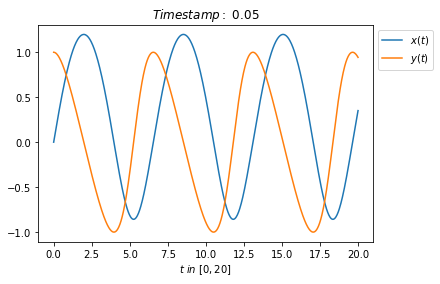

In [23]:
## MAKE PLOT HERE ##
fig,ax = plt.subplots()
xx = np.linspace(0,20,801)

ax.plot(xx,xplt)
ax.plot(xx,yplt)
ax.set_xlabel('$t \\ in \\ [0,20]$')
ax.legend(['$x(t)$','$y(t)$'],bbox_to_anchor=(1,1))
ax.set_title('$Timestamp: \\ 0.05$')

### TASK 3:

Now solve the modified initial-value problem using a 4th-order Runge-Kutta method.

$$
x'(t) \ = \ y(t), \quad y'(t) \ = \  -1  \ + \  \exp\left(\,-10\,x(t)\,\right) \quad \mathrm{with} \quad x(0) \ = \ 0 , \quad \mathrm{and} \quad y(0) \ = \ 1
$$

Use a timestep size small enough such that the method is stable. Make a plot of $x(t)$ and $y(t)$ on the same plot for $\ 0 \ \le \ t \  \le 20$. Make sure to include labels and a legend. 

In [24]:
### PUT CODE HERE ###
def F(t,x,y):
    return -1+np.exp(-10*x)

x = 0
y = 1
t = 0
te = 20
h = 0.05
# p = 1
xxplt = []
yyplt = []
while t <= 20:
    dx1 = (h/2)*y
    dy1 = (h/2)*F(t,x,y)
    
    dx2 = (h/2) * (y+dy1/2)
    dy2 = (h/2) * F(t+h/2, x + dx1/2, y + dy1/2)
    
    dx3 = (h/2) * (y + dy2/2)
    dy3 = (h/2) * F(t + h/2, x + dx2/2, y + dy2/2)
    
    dx4 = (h/2)*(y + dy3)
    dy4 = (h/2)*F(t + h/2, x + dx3, y + dy3)
    
    dx = (dx1 + 2*dx2 + 2*dx3 + dx4) / 6
    dy = (dy1 + 2*dy2 + 2*dy3 + dy4) / 6
    
    xxplt.append(x)
    yyplt.append(y)
    
    x = x + dx
    y = y + dy
    t = t + h/2 

Text(0.5,1,'$TimeStamp: \\ 0.05$')

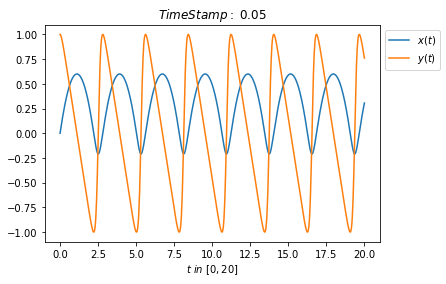

In [25]:
## MAKE PLOT HERE ##
fig,ax = plt.subplots()
xx = np.linspace(0,20,801)

ax.plot(xx,xxplt)
ax.plot(xx,yyplt)
ax.set_xlabel('$t \\ in \\ [0,20]$')
ax.legend(['$x(t)$','$y(t)$'],bbox_to_anchor=(1,1))
ax.set_title('$TimeStamp: \\ 0.05$')

### TASK 4:

The following quantity should stay constant in time:

$$
Z(t) \ = \ \frac{y(t)^{2}}{2} \ + \ \frac{1}{\alpha}\exp\left(\,-\alpha\,x(t)\,\right)  \ + \ x(t) \ - \ \frac{2+\alpha}{2\alpha} .
$$

Make a plot of $Z$ as a function of time for each case; $\alpha \ = \ 1, 10$. 

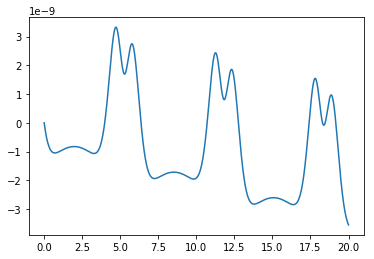

In [26]:
def Z(t,a):
    return y(t)*y(t)/2 + (1/a)*np.exp(-a*x(t)) + x(t) - (2+a)/(2*a)

# α = 1
fig,ax = plt.subplots()

m = np.linspace(0,20,801)

zplot = []

for i in range (0,801):
    zplot.append((yplt[i]**2)/2 + np.exp(-xplt[i]) + xplt[i] - (3/2))
    
ax.plot(m, zplot)

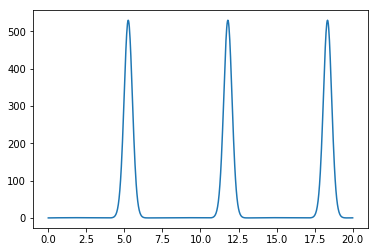

In [27]:
# α = 10
zzplot = []

for i in range (0,801):
    zzplot.append((yplt[i]**2)/2 + (np.exp(-10*xplt[i])/10) + xplt[i] - (3/5))
    
fig,ax = plt.subplots()
ax.plot(m, zzplot)

### TASK 5:
Take the real fast Fourier transform (FFT) of $x(t)$ and $y(t)$ for each $\alpha = 1,10$ in **TASKS 2 & 3**. Make log-log periodograms of each spectrum. Make sure to label the axes properly. 

You might need to sample your functions at different rates and adjust the range of the plots depending on the case. All the cases have enough going on to find something reasonably interesting; you won't see it unless you scale things well. 

*Hint: remember the FFT is much faster if the length is a power of 2!*

Text(0,0.5,'$FFT \\ of \\ y(t)$')

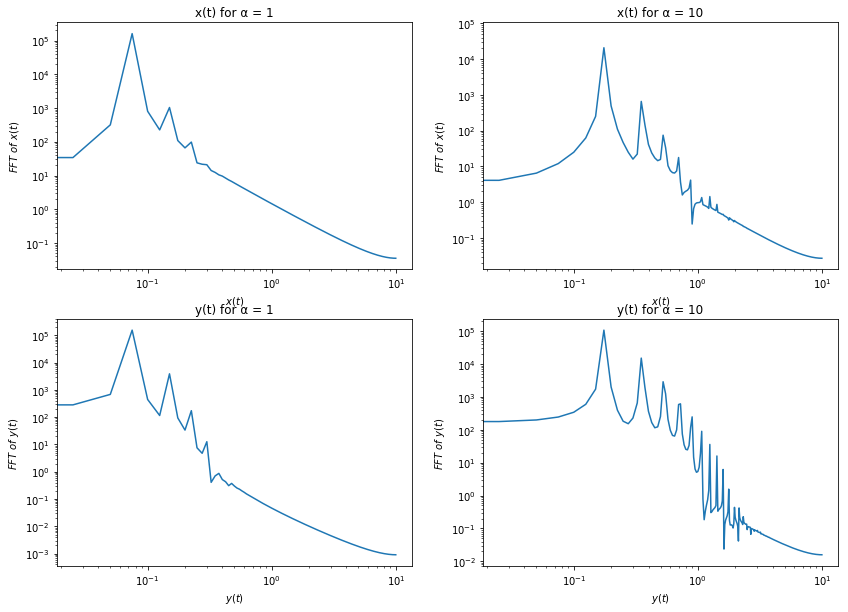

In [28]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

dt = 0.05 # time-step

α1x = np.fft.rfft(xplt)
α10x = np.fft.rfft(xxplt)

f1x = np.fft.rfftfreq(len(xplt),d=dt)
f10x = np.fft.rfftfreq(len(xxplt),d=dt)

α1y = np.fft.rfft(yplt)
α10y = np.fft.rfft(yyplt)

f1y = np.fft.rfftfreq(len(yplt),d=dt)
f10y = np.fft.rfftfreq(len(yyplt),d=dt)

fig, ax = plt.subplots(2,2,figsize=(14,10))
ax[0][0].loglog(f1x,np.abs(α1x)**2)
ax[0][0].set_title('x(t) for α = 1')
ax[0][0].set_xlabel('$x(t)$')
ax[0][0].set_ylabel('$FFT \\ of \\ x(t)$')
# ax[0][0].set_ylim([-50,50])

ax[0][1].loglog(f10x,np.abs(α10x)**2)
ax[0][1].set_title('x(t) for α = 10')
ax[0][1].set_xlabel('$x(t)$')
ax[0][1].set_ylabel('$FFT \\ of \\ x(t)$')

ax[1][0].loglog(f1y, np.abs(α1y)**2)
ax[1][0].set_title('y(t) for α = 1')
ax[1][0].set_xlabel('$y(t)$')
ax[1][0].set_ylabel('$FFT \\ of \\ y(t)$')

ax[1][1].loglog(f10y, np.abs(α10y)**2)
ax[1][1].set_title('y(t) for α = 10')
ax[1][1].set_xlabel('$y(t)$')
ax[1][1].set_ylabel('$FFT \\ of \\ y(t)$')




## 2b: Boundary-Value Problem:

We can have the same ODE as **Problem 2a**, but have a very different way of thinking about it. 

### TASK 6:

Solve the following non-linear 2-point boundary-value problem using Newton's method and 2nd-order finite differences.

$$
u''(x) + e^{\,u(x)} \ = \ 1 \quad \mathrm{for} \quad 0 < x < 1 , \quad \mathrm{and} \quad u(0)  \ = \ u(1) \ = \ 0
$$

Plot the solution making sure to label the axes properly.

*Hint: you could use your RK4 integrator to generate guesses to start the Newton iteration. And least you might be able to get the basic shape and amplitude.*




In [29]:
### PUT CODE HERE ###
n = 6

# This makes printing look a little nicer for our situation
np.set_printoptions(precision=3,suppress=True)

def chop(M,eps=1e-14):
    M[np.where(np.abs(M)<eps)] = 0
    print(M)

S = np.zeros((n+1,n+2))

S[0,0], S[0,-1] = 1, 1

# Middle matrix -- d^2/dx^2 T = 0
for i in range(1,n):
    S[i,i-1] = 1
    S[i,i]   = -2
    S[i,i+1] = 1

S[-1,-2], S[-1,-1] = 1, -1.5

print(S)

for k in range(1,n):
    S[k] = S[k] - S[k-1]  
    S[k] = S[k] / S[k][k]
    print('k = ',k)
    chop(S)
    print('----------------')  

for k in range(2,n+1):
    S[-k] -= S[-(k-1)]*S[-k][-k]
    print('k = ',k)
    chop(S)
    print('----------------')

def F(t,x,y):
    return 1-np.exp(1*x)

x = 0
y = 1.2 # initial guess for the first derivitative for x = 0
t = 0
te = 20
h = 0.05
# p = 1
T_6 = []
game= []
while t <= 20:
    dx1 = (h/2)*y
    dy1 = (h/2)*F(t,x,y)
    
    dx2 = (h/2) * (y+dy1/2)
    dy2 = (h/2) * F(t+h/2, x + dx1/2, y + dy1/2)
    
    dx3 = (h/2) * (y + dy2/2)
    dy3 = (h/2) * F(t + h/2, x + dx2/2, y + dy2/2)
    
    dx4 = (h/2)*(y + dy3)
    dy4 = (h/2)*F(t + h/2, x + dx3, y + dy3)
    
    dx = (dx1 + 2*dx2 + 2*dx3 + dx4) / 6
    dy = (dy1 + 2*dy2 + 2*dy3 + dy4) / 6
    
    T_6.append(x)
    game.append(y)
    
    x = x + dx
    y = y + dy
    t = t + h/2 

[[ 1.   0.   0.   0.   0.   0.   0.   1. ]
 [ 1.  -2.   1.   0.   0.   0.   0.   0. ]
 [ 0.   1.  -2.   1.   0.   0.   0.   0. ]
 [ 0.   0.   1.  -2.   1.   0.   0.   0. ]
 [ 0.   0.   0.   1.  -2.   1.   0.   0. ]
 [ 0.   0.   0.   0.   1.  -2.   1.   0. ]
 [ 0.   0.   0.   0.   0.   0.   1.  -1.5]]
k =  1
[[ 1.   0.   0.   0.   0.   0.   0.   1. ]
 [ 0.   1.  -0.5  0.   0.   0.   0.   0.5]
 [ 0.   1.  -2.   1.   0.   0.   0.   0. ]
 [ 0.   0.   1.  -2.   1.   0.   0.   0. ]
 [ 0.   0.   0.   1.  -2.   1.   0.   0. ]
 [ 0.   0.   0.   0.   1.  -2.   1.   0. ]
 [ 0.   0.   0.   0.   0.   0.   1.  -1.5]]
----------------
k =  2
[[ 1.     0.     0.     0.     0.     0.     0.     1.   ]
 [ 0.     1.    -0.5    0.     0.     0.     0.     0.5  ]
 [ 0.     0.     1.    -0.667  0.     0.     0.     0.333]
 [ 0.     0.     1.    -2.     1.     0.     0.     0.   ]
 [ 0.     0.     0.     1.    -2.     1.     0.     0.   ]
 [ 0.     0.     0.     0.     1.    -2.     1.     0.   ]
 [ 0.     0

Text(0,0.5,'$u(x)$')

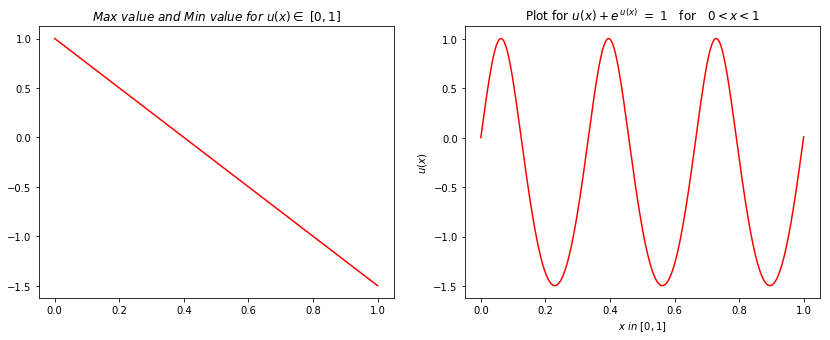

In [30]:
## MAKE PLOT HERE ##
# MAKE A PLOT
fig, ax = plt.subplots(1,2,figsize=(14,5))

T = S[:,-1]
x = np.linspace(0,1,len(T))

Y = np.linspace(0,1,801)
z = np.zeros(801)
ax[0].plot(x,T, color = 'red')
ax[0].set_title('$Max \\ value \\ and \\ Min \\ value \\ for \\ u(x) \in \\ [0,1] $')
ax[1].plot(Y,T_6,color = 'red')
ax[1].set_title('Plot for $u''(x) + e^{\,u(x)} \ = \ 1 \quad \mathrm{for} \quad 0 < x < 1$')
ax[1].set_xlabel('$x \\ in \\ [0,1]$')
ax[1].set_ylabel('$u(x)$')

### TASK 7:

Now solve the problem for $\alpha = 10$:

$$
u''(x) + e^{\,10 \, u(x)} \ = \ 1 \quad \mathrm{for} \quad 0 < x < 1 , \quad \mathrm{and} \quad u(0)  \ = \ u(1) \ = \ 0
$$

Plot the solution making sure to label the axes properly.

*Hint: this is challenging. You can generate a guess using the RK4 integrator.*



In [31]:
### PUT CODE HERE ###
# ### PUT CODE HERE ###

n = 6

# This makes printing look a little nicer for our situation
np.set_printoptions(precision=3,suppress=True)

def chop(M,eps=1e-14):
    M[np.where(np.abs(M)<eps)] = 0
    print(M)

S = np.zeros((n+1,n+2))

S[0,0], S[0,-1] = 1, 0.2

# Middle matrix -- d^2/dx^2 T = 0
for i in range(1,n):
    S[i,i-1] = 1
    S[i,i]   = -2
    S[i,i+1] = 1

S[-1,-2], S[-1,-1] = 1, -0.6

print(S)

for k in range(1,n):
    S[k] = S[k] - S[k-1]  
    S[k] = S[k] / S[k][k]
    print('k = ',k)
    chop(S)
    print('----------------')  
    
for k in range(2,n+1):
    S[-k] -= S[-(k-1)]*S[-k][-k]
    print('k = ',k)
    chop(S)
    print('----------------')
    

def F(t,x,y):
    return 1-np.exp(10*x)

x = 0
y = 0.975555555 # initial guess for the first derivative of x = 0
t = 0
te = 20
h = 0.05
# p = 1
u = []
u_prim = []
while t <= 20:
    dx1 = (h/2)*y
    dy1 = (h/2)*F(t,x,y)
    
    dx2 = (h/2) * (y+dy1/2)
    dy2 = (h/2) * F(t+h/2, x + dx1/2, y + dy1/2)
    
    dx3 = (h/2) * (y + dy2/2)
    dy3 = (h/2) * F(t + h/2, x + dx2/2, y + dy2/2)
    
    dx4 = (h/2)*(y + dy3)
    dy4 = (h/2)*F(t + h/2, x + dx3, y + dy3)
    
    dx = (dx1 + 2*dx2 + 2*dx3 + dx4) / 6
    dy = (dy1 + 2*dy2 + 2*dy3 + dy4) / 6
    
    u.append(x)
    u_prim.append(y)
    
    x = x + dx
    y = y + dy
    t = t + h/2 

[[ 1.   0.   0.   0.   0.   0.   0.   0.2]
 [ 1.  -2.   1.   0.   0.   0.   0.   0. ]
 [ 0.   1.  -2.   1.   0.   0.   0.   0. ]
 [ 0.   0.   1.  -2.   1.   0.   0.   0. ]
 [ 0.   0.   0.   1.  -2.   1.   0.   0. ]
 [ 0.   0.   0.   0.   1.  -2.   1.   0. ]
 [ 0.   0.   0.   0.   0.   0.   1.  -0.6]]
k =  1
[[ 1.   0.   0.   0.   0.   0.   0.   0.2]
 [ 0.   1.  -0.5  0.   0.   0.   0.   0.1]
 [ 0.   1.  -2.   1.   0.   0.   0.   0. ]
 [ 0.   0.   1.  -2.   1.   0.   0.   0. ]
 [ 0.   0.   0.   1.  -2.   1.   0.   0. ]
 [ 0.   0.   0.   0.   1.  -2.   1.   0. ]
 [ 0.   0.   0.   0.   0.   0.   1.  -0.6]]
----------------
k =  2
[[ 1.     0.     0.     0.     0.     0.     0.     0.2  ]
 [ 0.     1.    -0.5    0.     0.     0.     0.     0.1  ]
 [ 0.     0.     1.    -0.667  0.     0.     0.     0.067]
 [ 0.     0.     1.    -2.     1.     0.     0.     0.   ]
 [ 0.     0.     0.     1.    -2.     1.     0.     0.   ]
 [ 0.     0.     0.     0.     1.    -2.     1.     0.   ]
 [ 0.     0

Text(0,0.5,'$u(x)$')

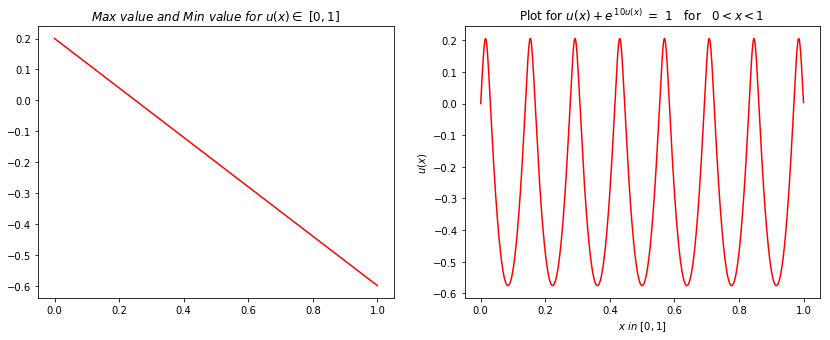

In [32]:
## MAKE PLOT HERE ##
fig, ax = plt.subplots(1,2,figsize=(14,5))

T = S[:,-1]
x = np.linspace(0,1,len(T))

u_time = np.linspace(0,1,801)
ax[0].plot(x,T, color = 'red')
ax[0].set_title('$Max \\ value \\ and \\ Min \\ value \\ for \\ u(x) \in \\ [0,1] $')
ax[1].plot(u_time,u, color = 'red')
ax[1].set_title('Plot for $u''(x) + e^{\,10u(x)} \ = \ 1 \quad \mathrm{for} \quad 0 < x < 1$')
ax[1].set_xlabel('$x \\ in \\ [0,1]$')
ax[1].set_ylabel('$u(x)$')

### TASK 8:

What can you say about the solutions to the problem 

$$
u''(x) + e^{\,\pi^{2} \, u(x)} \ = \ 1 \quad \mathrm{for} \quad 0 < x < 1 , \quad \mathrm{and} \quad u(0)  \ = \ u(1) \ = \ 0
$$

I want a summary in words of the issues with this problem.


### Summary:
As for the solution of this problem, the plot for the solution has a costant amplitude. And both shape and amplitude are similar the previous section, where $\alpha = 10$

While for the issues for two-point value problem for systems of second-order differential equations with constant coefficients are solved in terms of a solution of an algebraic matrix equation related to the problem, the solution we get is through a given initial guess, so it is more like to approximate the solution and upper error bounds of the algebric matrix equation.

## 2c: Bouncy-Value Problem:

### TASK 9:

I haven't yet mentioned why would we want to solve the given equation? Becuase it's a crude model of a ***bouncing ball.***: $x(t) \ = $ height of the ball, $y(t) \ =$ speed of the ball. The ball falls under constant gravity $g = -1$, until it gets close to $x \approx 0$, when the bounce force becomes large very quickly. After that it bounces back and the whole thing starts again. 

Adding a bit of friction makes things more interesting.

$$
x'(t) \ = \ y(t)  , \quad y'(t) \ = \ - 1 \ + \  \exp( - \alpha \, x(t)\, ) \ - \ \gamma\,y(t)
$$

Where $g\ =$ gravity, $\gamma\ =$ damping rate, and $\alpha \ =$ bounciness coefficient.

Investigate this model for different parameters. I want you to integrate this equation using RK4, and show different interesting behaviour depending on the parameters. For example: Change the initial velocity, and see how that changes the picture. What about the damping coefficient? Etc... 

Perhaps you might learn something interesting by plotting the energy as a function of time?

$$
E(t) \ = \ \frac{y(t)^{2}}{2} \ + \ \frac{1}{\alpha}\exp\left(\,-\alpha\,x(t)\,\right)  \ + \ x(t)
$$



The more you can say that is interesting about this the more you can make up for lost marks on the other questions on the assignment. 



In [33]:
#  α is bounciness coefficient or the coefficients of restitution
#  r is damping rate
#  x(t) = height of the ball
#  y(t) = velocity of the ball

import matplotlib.pyplot as plt
from numpy import *

def formula(t,x,y,α,γ):
    return -1+np.exp(-α*x) - γ*y

def E(x,y,α):
    energy = []
    x_part = []
    y_part = []
    for element in x:
        x_part.append((1/α)*np.exp(-α*element) + element)
    
    for element in y:
        y_part.append(element**2/2)
    
    for x,y in zip(x_part,y_part):
        energy.append(x+y)
    
    return energy

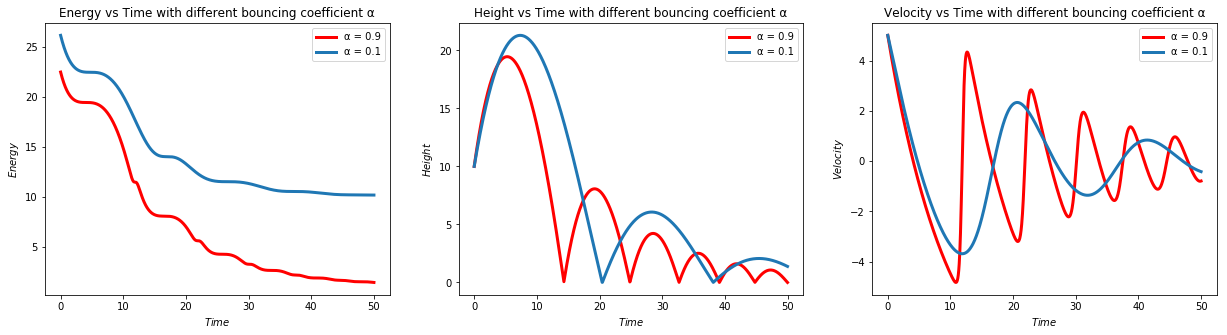

In [34]:
x = 10 # initial height  
y = 5  # initial speed 
t = 0
te = 20
h = 0.05
α = 0.9
γ = 0.1
g = -1
# p = 1
height = []
speed = []

heightG0 = []
speedG0 = []
while t < 50:
    dx1 = (h/2)*y
    dy1 = (h/2)*formula(t,x,y,α,γ)
    
    dx2 = (h/2) * (y+dy1/2)
    dy2 = (h/2) * formula(t+h/2, x+dx1/2, y+dy1/2,α,γ)
    
    dx3 = (h/2) * (y + dy2/2)
    dy3 = (h/2) * formula(t+h/2, x+dx2/2, y+dy2/2,α,γ)
    
    dx4 = (h/2)*(y + dy3)
    dy4 = (h/2)*formula(t+h/2, x+dx3, y+dy3,α,γ)
    
    dx = (dx1 + 2*dx2 + 2*dx3 + dx4) / 6
    dy = (dy1 + 2*dy2 + 2*dy3 + dy4) / 6
    
    if x > 0:
        heightG0.append(x)
        speedG0.append(y)
    
    height.append(x)
    speed.append(y)
    
    x = x + dx
    y = y + dy
    t = t + h/2

# print(len(height))
time = np.linspace(0,50,2001)
time_1 = np.linspace(0,50,1541)

fig, ax = plt.subplots(1,3,figsize=(21,5))

ax[0].plot(time, E(height,speed,α),color='red',lw=3)
ax[0].set_title('Energy vs Time with different bouncing coefficient α')
ax[0].set_xlabel('$Time$')
ax[0].set_ylabel('$Energy$')

ax[1].plot(time_1,heightG0,color='red',lw=3)
ax[1].set_title('Height vs Time with different bouncing coefficient α')
ax[1].set_xlabel('$Time$')
ax[1].set_ylabel('$Height$')

ax[2].plot(time,speed,color='red',lw=3)
ax[2].set_title('Velocity vs Time with different bouncing coefficient α')
ax[2].set_xlabel('$Time$')
ax[2].set_ylabel('$Velocity$')

x = 10 # initial height  
y = 5  # initial speed 
α = 0.1
γ = 0.1

height_2_part = []
speed_2_part = []

height_2 = []
speed_2 = []
t = 0
while t < 50:
    dx1 = (h/2)*y
    dy1 = (h/2)*formula(t,x,y,α,γ)
    
    dx2 = (h/2) * (y+dy1/2)
    dy2 = (h/2) * formula(t+h/2, x+dx1/2, y+dy1/2,α,γ)
    
    dx3 = (h/2) * (y + dy2/2)
    dy3 = (h/2) * formula(t+h/2, x+dx2/2, y+dy2/2,α,γ)
    
    dx4 = (h/2)*(y + dy3)
    dy4 = (h/2)*formula(t+h/2, x+dx3, y+dy3,α,γ)
    
    dx = (dx1 + 2*dx2 + 2*dx3 + dx4) / 6
    dy = (dy1 + 2*dy2 + 2*dy3 + dy4) / 6
    
    if x > 0:
        height_2_part.append(x)
        speed_2_part.append(y)
    
    height_2.append(x)
    speed_2.append(y)
    
    x = x + dx
    y = y + dy
    t = t + h/2 
# print(len(height_2_part))
# print(len(height_2))

time_2 = np.linspace(0,50,1289)
ax[0].plot(time, E(height_2,speed_2,α), lw=3)
ax[0].legend(['α = 0.9','α = 0.1'])

ax[1].plot(time_2,height_2_part,lw=3)
ax[1].legend(['α = 0.9','α = 0.1'])

ax[2].plot(time,speed_2,lw=3)
ax[2].legend(['α = 0.9','α = 0.1'])

First we change the bounciness coefficient $\alpha$ while keeping everything else constant.

Here we change $\alpha$ from 0.9 to 0.1, resulting in more kinetic energy lost at each bounce (height = 0) and during the "flight" (height > 0), less total number of bounces and faster decline in height and velocity. The curve patterns in all three graphs have changed, especially the velocity one.

Next we modify the dampling rate $\gamma$.

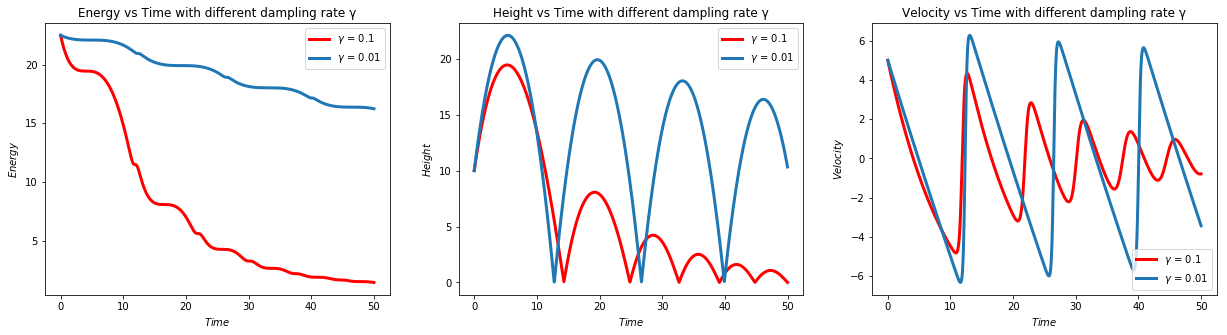

In [36]:
x = 10 # initial height  
y = 5  # initial speed 
t = 0
te = 20
h = 0.05
α = 0.9
γ = 0.1
g = -1
# p = 1
height = []
speed = []

heightG0 = []
speedG0 = []
while t < 50:
    dx1 = (h/2)*y
    dy1 = (h/2)*formula(t,x,y,α,γ)
    
    dx2 = (h/2) * (y+dy1/2)
    dy2 = (h/2) * formula(t+h/2, x+dx1/2, y+dy1/2,α,γ)
    
    dx3 = (h/2) * (y + dy2/2)
    dy3 = (h/2) * formula(t+h/2, x+dx2/2, y+dy2/2,α,γ)
    
    dx4 = (h/2)*(y + dy3)
    dy4 = (h/2)*formula(t+h/2, x+dx3, y+dy3,α,γ)
    
    dx = (dx1 + 2*dx2 + 2*dx3 + dx4) / 6
    dy = (dy1 + 2*dy2 + 2*dy3 + dy4) / 6
    
    if x > 0:
        heightG0.append(x)
        speedG0.append(y)
    
    height.append(x)
    speed.append(y)
    
    x = x + dx
    y = y + dy
    t = t + h/2

# print(len(height))
time = np.linspace(0,50,2001)
time_1 = np.linspace(0,50,1541)

fig, ax = plt.subplots(1,3,figsize=(21,5))

ax[0].plot(time, E(height,speed,α),color='red',lw=3)
ax[0].set_title('Energy vs Time with different dampling rate γ')
ax[0].set_xlabel('$Time$')
ax[0].set_ylabel('$Energy$')

ax[1].plot(time_1,heightG0,color='red',lw=3)
ax[1].set_title('Height vs Time with different dampling rate γ')
ax[1].set_xlabel('$Time$')
ax[1].set_ylabel('$Height$')

ax[2].plot(time,speed,color='red',lw=3)
ax[2].set_title('Velocity vs Time with different dampling rate γ')
ax[2].set_xlabel('$Time$')
ax[2].set_ylabel('$Velocity$')


x = 10 # initial height  
y = 5  # initial speed 
α = 0.9
γ = 0.01

height_3_part = []
speed_3_part = []

height_3 = []
speed_3 = []
t = 0
while t < 50:
    dx1 = (h/2)*y
    dy1 = (h/2)*formula(t,x,y,α,γ)
    
    dx2 = (h/2) * (y+dy1/2)
    dy2 = (h/2) * formula(t+h/2, x+dx1/2, y+dy1/2,α,γ)
    
    dx3 = (h/2) * (y + dy2/2)
    dy3 = (h/2) * formula(t+h/2, x+dx2/2, y+dy2/2,α,γ)
    
    dx4 = (h/2)*(y + dy3)
    dy4 = (h/2)*formula(t+h/2, x+dx3, y+dy3,α,γ)
    
    dx = (dx1 + 2*dx2 + 2*dx3 + dx4) / 6
    dy = (dy1 + 2*dy2 + 2*dy3 + dy4) / 6
    
    if x > 0:
        height_3_part.append(x)
        speed_3_part.append(y)
    
    height_3.append(x)
    speed_3.append(y)
    
    x = x + dx
    y = y + dy
    t = t + h/2 
# print(len(height_3_part))
# print(len(height_3))

time_3 = np.linspace(0,50,1818)
ax[0].plot(time, E(height_3,speed_3,α),lw=3)
ax[0].legend(['$\gamma$ = 0.1','$\gamma$ = 0.01'])

ax[1].plot(time_3,height_3_part,lw=3)
ax[1].legend(['$\gamma$ = 0.1','$\gamma$ = 0.01'])

ax[2].plot(time,speed_3,lw=3)
ax[2].legend(['$\gamma$ = 0.1','$\gamma$ = 0.01'])

<br>

Here we changed the dampling rate $\gamma$ from 0.1 to 0.01.

By decreasing $\gamma$, we observe that less kinetic energy is lost at each bounce and during the "flight", leading to a much slower decline in maximum height and velocity achieved per bounce. The curve patterns in all three graphs have changed.

Next we explore how initial speed impacts the process.

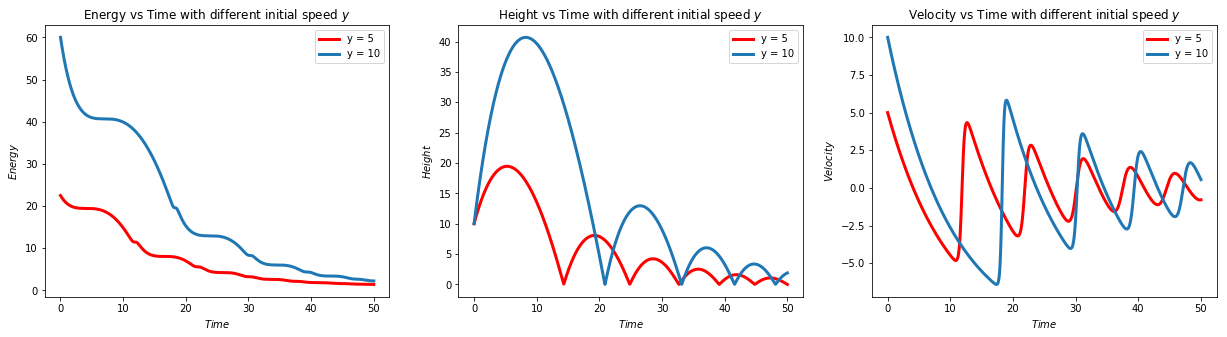

In [37]:
x = 10 # initial height  
y = 5  # initial speed 
t = 0
te = 20
h = 0.05
α = 0.9
γ = 0.1
g = -1
# p = 1
height = []
speed = []

heightG0 = []
speedG0 = []
while t < 50:
    dx1 = (h/2)*y
    dy1 = (h/2)*formula(t,x,y,α,γ)
    
    dx2 = (h/2) * (y+dy1/2)
    dy2 = (h/2) * formula(t+h/2, x+dx1/2, y+dy1/2,α,γ)
    
    dx3 = (h/2) * (y + dy2/2)
    dy3 = (h/2) * formula(t+h/2, x+dx2/2, y+dy2/2,α,γ)
    
    dx4 = (h/2)*(y + dy3)
    dy4 = (h/2)*formula(t+h/2, x+dx3, y+dy3,α,γ)
    
    dx = (dx1 + 2*dx2 + 2*dx3 + dx4) / 6
    dy = (dy1 + 2*dy2 + 2*dy3 + dy4) / 6
    
    if x > 0:
        heightG0.append(x)
        speedG0.append(y)
    
    height.append(x)
    speed.append(y)
    
    x = x + dx
    y = y + dy
    t = t + h/2

# print(len(height))
time = np.linspace(0,50,2001)
time_1 = np.linspace(0,50,1541)

fig, ax = plt.subplots(1,3,figsize=(21,5))

ax[0].plot(time, E(height,speed,α),color='red',lw=3)
ax[0].set_title('Energy vs Time with different initial speed $y$')
ax[0].set_xlabel('$Time$')
ax[0].set_ylabel('$Energy$')

ax[1].plot(time_1,heightG0,color='red',lw=3)
ax[1].set_title('Height vs Time with different initial speed $y$')
ax[1].set_xlabel('$Time$')
ax[1].set_ylabel('$Height$')

ax[2].plot(time,speed,color='red',lw=3)
ax[2].set_title('Velocity vs Time with different initial speed $y$')
ax[2].set_xlabel('$Time$')
ax[2].set_ylabel('$Velocity$')


x = 10 # initial height  
y = 10  # initial speed 
α = 0.9
γ = 0.1

height_4_part = []
speed_4_part = []

height_4 = []
speed_4 = []
t = 0
while t < 50:
    dx1 = (h/2)*y
    dy1 = (h/2)*formula(t,x,y,α,γ)
    
    dx2 = (h/2) * (y+dy1/2)
    dy2 = (h/2) * formula(t+h/2, x+dx1/2, y+dy1/2,α,γ)
    
    dx3 = (h/2) * (y + dy2/2)
    dy3 = (h/2) * formula(t+h/2, x+dx2/2, y+dy2/2,α,γ)
    
    dx4 = (h/2)*(y + dy3)
    dy4 = (h/2)*formula(t+h/2, x+dx3, y+dy3,α,γ)
    
    dx = (dx1 + 2*dx2 + 2*dx3 + dx4) / 6
    dy = (dy1 + 2*dy2 + 2*dy3 + dy4) / 6
    
    if x > 0:
        height_4_part.append(x)
        speed_4_part.append(y)
    
    height_4.append(x)
    speed_4.append(y)
    
    x = x + dx
    y = y + dy
    t = t + h/2 
# print(len(height_4_part))
# print(len(height_4))
#fig, ax = plt.subplots(1,3,figsize=(21,5))

time_4 = np.linspace(0,50,1681)
ax[0].plot(time, E(height_4,speed_4,α),lw=3)
ax[0].legend(['y = 5','y = 10'])

ax[1].plot(time_4,height_4_part,lw=3)
ax[1].legend(['y = 5','y = 10'])

ax[2].plot(time,speed_4,lw=3)
ax[2].legend(['y = 5','y = 10'])

Here we change the initial speed $y$ from 5 to 10 while keeping all other parameters the same ($x = 10, \alpha = 0.9, \gamma = 0.1)$.

Observing our graph above, we find the dramatically increased initial speed gives a huge boost to all aspects of the process. While we witness higher numerical values and longer periods of bounce and decline in three properties, the curve patterns are similar thanks to intrinsic properties (α,γ) being constant.

Next let us change the initial height while keeping other parameters constant and see its impact.

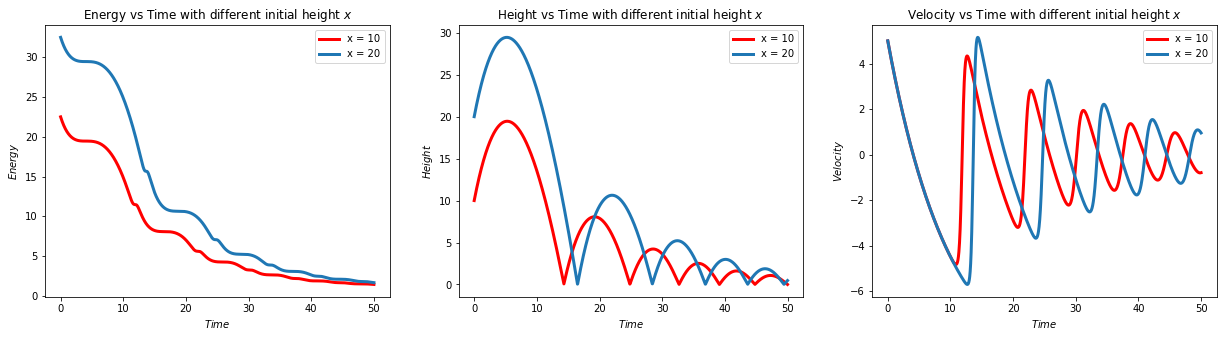

In [38]:
x = 10 # initial height  
y = 5  # initial speed 
t = 0
te = 20
h = 0.05
α = 0.9
γ = 0.1
g = -1
# p = 1
height = []
speed = []

heightG0 = []
speedG0 = []
while t < 50:
    dx1 = (h/2)*y
    dy1 = (h/2)*formula(t,x,y,α,γ)
    
    dx2 = (h/2) * (y+dy1/2)
    dy2 = (h/2) * formula(t+h/2, x+dx1/2, y+dy1/2,α,γ)
    
    dx3 = (h/2) * (y + dy2/2)
    dy3 = (h/2) * formula(t+h/2, x+dx2/2, y+dy2/2,α,γ)
    
    dx4 = (h/2)*(y + dy3)
    dy4 = (h/2)*formula(t+h/2, x+dx3, y+dy3,α,γ)
    
    dx = (dx1 + 2*dx2 + 2*dx3 + dx4) / 6
    dy = (dy1 + 2*dy2 + 2*dy3 + dy4) / 6
    
    if x > 0:
        heightG0.append(x)
        speedG0.append(y)
    
    height.append(x)
    speed.append(y)
    
    x = x + dx
    y = y + dy
    t = t + h/2

# print(len(height))
time = np.linspace(0,50,2001)
time_1 = np.linspace(0,50,1541)

fig, ax = plt.subplots(1,3,figsize=(21,5))

ax[0].plot(time, E(height,speed,α),color='red',lw=3)
ax[0].set_title('Energy vs Time with different initial height $x$')
ax[0].set_xlabel('$Time$')
ax[0].set_ylabel('$Energy$')

ax[1].plot(time_1,heightG0,color='red',lw=3)
ax[1].set_title('Height vs Time with different initial height $x$')
ax[1].set_xlabel('$Time$')
ax[1].set_ylabel('$Height$')

ax[2].plot(time,speed,color='red',lw=3)
ax[2].set_title('Velocity vs Time with different initial height $x$')
ax[2].set_xlabel('$Time$')
ax[2].set_ylabel('$Velocity$')

x = 20 # initial height  
y = 5  # initial speed 
α = 0.9
γ = 0.1

height_5_part = []
speed_5_part = []

height_5 = []
speed_5 = []
t = 0
while t < 50:
    dx1 = (h/2)*y
    dy1 = (h/2)*formula(t,x,y,α,γ)
    
    dx2 = (h/2) * (y+dy1/2)
    dy2 = (h/2) * formula(t+h/2, x+dx1/2, y+dy1/2,α,γ)
    
    dx3 = (h/2) * (y + dy2/2)
    dy3 = (h/2) * formula(t+h/2, x+dx2/2, y+dy2/2,α,γ)
    
    dx4 = (h/2)*(y + dy3)
    dy4 = (h/2)*formula(t+h/2, x+dx3, y+dy3,α,γ)
    
    dx = (dx1 + 2*dx2 + 2*dx3 + dx4) / 6
    dy = (dy1 + 2*dy2 + 2*dy3 + dy4) / 6
    
    if x > 0:
        height_5_part.append(x)
        speed_5_part.append(y)
    
    height_5.append(x)
    speed_5.append(y)
    
    x = x + dx
    y = y + dy
    t = t + h/2 
# print(len(height_5_part))
# print(len(height_5))

time_5 = np.linspace(0,50,1560)
ax[0].plot(time, E(height_5,speed_5,α),lw=3)
ax[0].legend(['x = 10','x = 20'])

ax[1].plot(time_5,height_5_part,lw=3)
ax[1].legend(['x = 10','x = 20'])

ax[2].plot(time,speed_5,lw=3)
ax[2].legend(['x = 10','x = 20'])



By increasing the initial height from 10 to 20, we observe that all properties of the bouncing process are amplified, with higher energy, enhanced height and faster speed. However, due to intrinsic properties (α,γ) being constant, the curve patterns are similar.

In conclusion, changing the inherent properties of the ball, such as dampling rate and bounciness coefficient, will fundamentally alter the shapes of performance curves. In contrast, modifying the exterior conditions, namely initial height and speed, would only change the size of curves, i.e, stretching horizontally and/or vertically, while preserving the original shape.

# END ASSIGNMENT